### Gender Career IAT EDA 

See other notebook in this repo (Gender Career IAT Cleaning) for Cleaning Code & Notes

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import glob
import seaborn as sns
%matplotlib inline
from scipy import stats
import matplotlib.patches as mpatches


sns.set_theme(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [11]:
implicit_df = pd.read_csv('data/usa_final.csv')

In [12]:
implicit_df = implicit_df.drop(columns='Unnamed: 0')

In [14]:
implicit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381834 entries, 0 to 1381833
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   session_id         1381834 non-null  float64
 1   year               1381834 non-null  int64  
 2   Implicit_Score     1381834 non-null  float64
 3   Explicit_Reported  1284634 non-null  object 
 4   anninc             1111587 non-null  object 
 5   edu_14             1248084 non-null  float64
 6   politicalid_7      1381834 non-null  object 
 7   STATE              937169 non-null   object 
 8   religionid         1081189 non-null  object 
 9   age                1250214 non-null  float64
 10  sex                1381834 non-null  object 
 11  raceomb            1381834 non-null  object 
 12  occu_bp            1136111 non-null  object 
 13  assocareer_int     1284634 non-null  float64
 14  religionid_int     1081189 non-null  float64
 15  edu_int            1248084 non-n

In [16]:
implicit_df = implicit_df.drop(columns=['anninc', 'STATE', 'raceomb', 'occu_bp'])

In [75]:
implicit_df = implicit_df.rename(columns={'assocareer_int': 'Explicit_Reported_Int'})

In [78]:
implicit = implicit_df.dropna()

In [79]:
implicit.count()

session_id               1016675
year                     1016675
Implicit_Score           1016675
Explicit_Reported        1016675
edu_14                   1016675
politicalid_7            1016675
religionid               1016675
age                      1016675
sex                      1016675
Explicit_Reported_Int    1016675
religionid_int           1016675
edu_int                  1016675
political_int            1016675
age_groups               1016675
dtype: int64

In [80]:
implicit.Implicit_Score.max(), implicit.Implicit_Score.min(), implicit.Implicit_Score.mean() 

(1.834496894436833, -1.8724249031235816, 0.3645207833038649)

In [81]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = (p.get_x() + p.get_width() / 2)
                _y = (p.get_y() + p.get_height()) + 3_000
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        

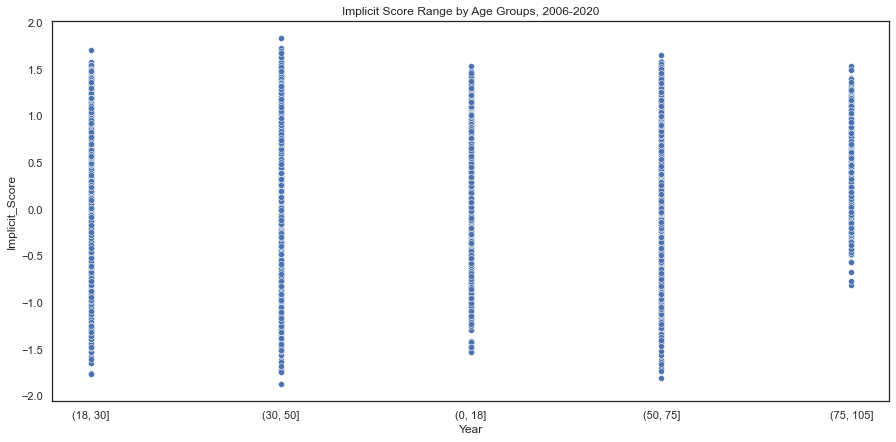

In [82]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(x=implicit.age_groups, y=implicit.Implicit_Score)
show_values_on_bars(ax)
ax.set(title='Implicit Score Range by Age Groups, 2006-2020', ylabel='Implicit_Score', xlabel='Year')
plt.show();

In [109]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [83]:
implicit.sex.value_counts()

Female          701574
Male            312797
Not Reported      2304
Name: sex, dtype: int64

In [86]:
sex_df = implicit[['sex', 'year', 'Implicit_Score', 'Explicit_Reported', 'Explicit_Reported_Int']]

In [87]:
rel_df = implicit[['Implicit_Score', 'Explicit_Reported', 'Explicit_Reported_Int', 'year', 'religionid', 'religionid_int']]

In [50]:
pol_df = implicit[['Implicit_Score', 'Explicit_Reported', 'Explicit_Reported_Int', 'year', 'politicalid_7', 'political_int']]

In [88]:
age_df = implicit[['Implicit_Score', 'Explicit_Reported', 'Explicit_Reported_Int', 'year', 'age', 'age_groups']]

In [90]:
stats.pearsonr(x=implicit.Implicit_Score, y=implicit.Explicit_Reported_Int)

(0.0892388959907407, 0.0)

In [190]:
sex_pr = pd.crosstab(implicit.year, implicit.sex, values=implicit.session_id, aggfunc=np.sum, normalize='index')
sex_pr

sex,Female,Male,Not Reported
year,,,
2006,0.746918,0.250720,0.002362
2007,0.753635,0.243187,0.003178
2008,0.741386,0.253948,0.004667
2009,0.732179,0.263881,0.003940
2010,0.733213,0.262819,0.003969
2011,0.738452,0.257904,0.003643
2012,0.722616,0.273921,0.003462
2013,0.709385,0.283529,0.007086
2014,0.696143,0.294173,0.009684


In [205]:
rel_pr = pd.crosstab(implicit.year, implicit.religionid_int, values=implicit.session_id, aggfunc=np.sum, normalize='index')
rel_pr

religionid_int,1.0,2.0,3.0,4.0
year,,,,
2006,0.074733,0.335531,0.405772,0.183964
2007,0.071172,0.330640,0.412840,0.185348
2008,0.078318,0.328578,0.412699,0.180405
2009,0.142610,0.346993,0.356137,0.154260
2010,0.155920,0.337662,0.351069,0.155349
2011,0.159722,0.341678,0.348324,0.150277
2012,0.172791,0.351015,0.335026,0.141168
2013,0.185329,0.352976,0.324783,0.136912
2014,0.184068,0.347776,0.328919,0.139238


In [206]:
pol_pr = pd.crosstab(implicit.year, implicit.political_int, values=implicit.session_id, aggfunc=np.sum, normalize='index')
pol_

political_int,1.0,2.0,3.0,4.0,5.0,6.0,7.0
year,,,,,,,
2006,0.051218,0.148283,0.116506,0.295447,0.121824,0.190529,0.076193
2007,0.040659,0.157419,0.117226,0.321522,0.124850,0.175677,0.062646
2008,0.046259,0.151741,0.111233,0.310439,0.119606,0.190434,0.070288
2009,0.046772,0.144114,0.105717,0.328171,0.119030,0.189440,0.066757
2010,0.047382,0.145558,0.106167,0.363884,0.112263,0.167566,0.057180
2011,0.043111,0.143276,0.107280,0.375402,0.112737,0.164811,0.053382
2012,0.041378,0.130986,0.101855,0.387075,0.108231,0.168557,0.061917
2013,0.039025,0.125973,0.100672,0.376777,0.110847,0.179790,0.066916
2014,0.038191,0.132540,0.107625,0.367629,0.111279,0.175777,0.066960


In [262]:
age_pr = pd.crosstab(implicit.year, implicit.age_groups, values=implicit.session_id, aggfunc=np.sum, normalize='index')
age_pr

age_groups,"(0, 18]","(18, 30]","(30, 50]","(50, 75]","(75, 105]"
year,,,,,
2006,0.222012,0.472631,0.235539,0.068852,0.000967
2007,0.177229,0.510684,0.245931,0.065746,0.000410
2008,0.186949,0.520088,0.230488,0.062008,0.000466
2009,0.174782,0.519384,0.239210,0.066086,0.000537
2010,0.187200,0.516531,0.230293,0.065574,0.000402
2011,0.172007,0.511988,0.250153,0.065475,0.000377
2012,0.154930,0.503213,0.272430,0.069039,0.000388
2013,0.143144,0.490406,0.291261,0.074627,0.000562
2014,0.142034,0.483273,0.282881,0.091315,0.000496


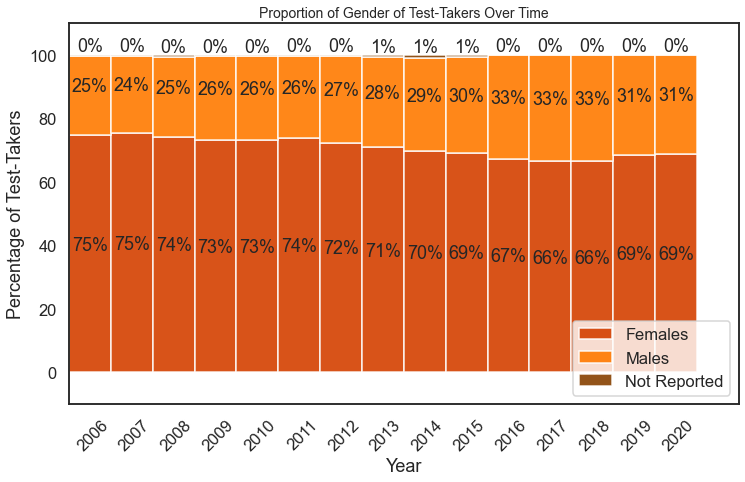

In [267]:
f, ax = plt.subplots(1, figsize=(12,7))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(sex_pr['Female']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(sex_pr['Female'], sex_pr['Male'], sex_pr['Not Reported'])]

# Create the percentage of the total score the pre_score value for each participant was
fem_rel = [i / j * 100 for  i,j in zip(sex_pr['Female'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
male_rel = [i / j * 100 for  i,j in zip(sex_pr['Male'], totals)]

# Create the percentage of the total score the post_score value for each participant was
nr_rel = [i / j * 100 for  i,j in zip(sex_pr['Not Reported'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       fem_rel, 
       # labeled 
       label='Females', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#D44000',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       male_rel, 
       # with pre_rel
       bottom=fem_rel, 
       # labeled 
       label='Males', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF7A00', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white',
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       nr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(fem_rel, male_rel)], 
       # labeled 
       label='Not Reported',
       # with alpha
       alpha=0.9, 
       # with color
       color='#864000', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be years
plt.xticks(tick_pos, years)
ax.set_ylabel("Percentage of Test-Takers")
ax.set_xlabel("Year")
ax.set_title("Proportion of Gender of Test-Takers Over Time", fontsize=14)
ax.legend()

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set_theme('talk')
sns.set_style('white')

for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

# show plot
plt.show()

# source = https://chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/

In [249]:
pal_hls = ['#6e90bf', '#aab8d0', '#e4e5eb', '#f2dfdd', '#d9a6a4', '#c26f6d', '#a22f35']

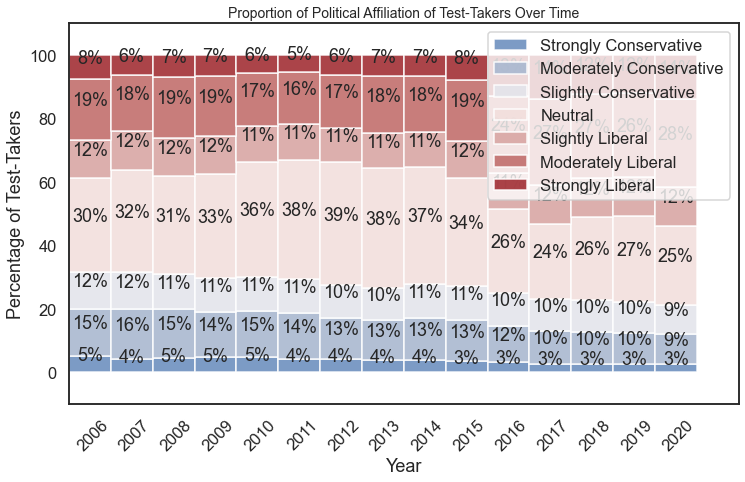

In [268]:
f, ax = plt.subplots(1, figsize=(12,7))
colors = pal_hls

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(pol_pr[1.0]))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(pol_pr[1.0], pol_pr[2.0], pol_pr[3.0], pol_pr[4.0], pol_pr[5.0], pol_pr[6.0], pol_pr[7.0])]

# Create the percentage of the total score the pre_score value for each participant was
one_rel = [i / j * 100 for  i,j in zip(pol_pr[1.0], totals)]

# Create the percentage of the total score the mid_score value for each participant was
two_rel = [i / j * 100 for  i,j in zip(pol_pr[2.0], totals)]

# Create the percentage of the total score the post_score value for each participant was
three_rel = [i / j * 100 for  i,j in zip(pol_pr[3.0], totals)]
four_rel = [i / j * 100 for  i,j in zip(pol_pr[4.0], totals)]
five_rel = [i / j * 100 for  i,j in zip(pol_pr[5.0], totals)]
six_rel = [i / j * 100 for  i,j in zip(pol_pr[6.0], totals)]
seven_rel = [i / j * 100 for  i,j in zip(pol_pr[7.0], totals)]

ax.bar(bar_l, 
       one_rel, 
       # labeled 
       label='Strongly Conservative', 
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[0],
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       two_rel, 
       # with pre_rel
       bottom=one_rel, 
       # labeled 
       label='Moderately Conservative', 
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[1], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white',
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       three_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(one_rel, two_rel)], 
       # labeled 
       label='Slightly Conservative',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[2], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       four_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(one_rel, two_rel, three_rel)], 
       # labeled 
       label='Neutral',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[3], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       five_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(one_rel, two_rel, three_rel, four_rel)], 
       # labeled 
       label='Slightly Liberal',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[4], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       six_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l+m for i,j,k,l,m in zip(one_rel, two_rel, three_rel, four_rel, five_rel)], 
       # labeled 
       label='Moderately Liberal',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[5], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       seven_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(one_rel, two_rel, three_rel, four_rel, five_rel, six_rel)], 
       # labeled 
       label='Strongly Liberal',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[6], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be years
plt.xticks(tick_pos, years)
ax.set_ylabel("Percentage of Test-Takers")
ax.set_xlabel("Year")
ax.set_title("Proportion of Political Affiliation of Test-Takers Over Time", fontsize=14)
ax.legend()

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set_theme('talk')
sns.set_style('white')

for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

# show plot
plt.show()

# source = https://chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/

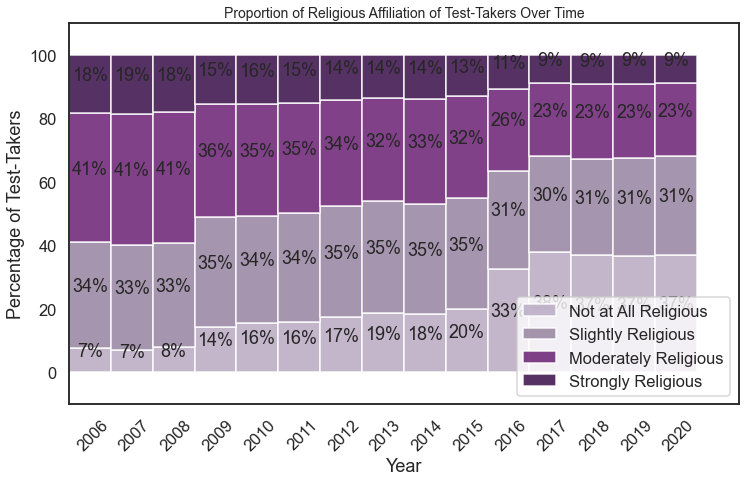

In [269]:
f, ax = plt.subplots(1, figsize=(12,7))
colors = ['#BDAEC6', '#9C8AA5', '#732C7B', '#421C52']

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(rel_pr[1.0]))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l for i,j,k,l in zip(rel_pr[1.0], rel_pr[2.0], rel_pr[3.0], rel_pr[4.0])]

# Create the percentage of the total score the pre_score value for each participant was
one_rel = [i / j * 100 for  i,j in zip(rel_pr[1.0], totals)]

# Create the percentage of the total score the mid_score value for each participant was
two_rel = [i / j * 100 for  i,j in zip(rel_pr[2.0], totals)]

# Create the percentage of the total score the post_score value for each participant was
three_rel = [i / j * 100 for  i,j in zip(rel_pr[3.0], totals)]
four_rel = [i / j * 100 for  i,j in zip(rel_pr[4.0], totals)]


ax.bar(bar_l, 
       one_rel, 
       # labeled 
       label='Not at All Religious', 
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[0],
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       two_rel, 
       # with pre_rel
       bottom=one_rel, 
       # labeled 
       label='Slightly Religious', 
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[1], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white',
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       three_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(one_rel, two_rel)], 
       # labeled 
       label='Moderately Religious',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[2], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       four_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(one_rel, two_rel, three_rel)], 
       # labeled 
       label='Strongly Religious',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[3], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be years
plt.xticks(tick_pos, years)
ax.set_ylabel("Percentage of Test-Takers")
ax.set_xlabel("Year")
ax.set_title("Proportion of Religious Affiliation of Test-Takers Over Time", fontsize=14)
ax.legend()

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set_theme('talk')
sns.set_style('white')

for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

# show plot
plt.show()

# source = https://chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/

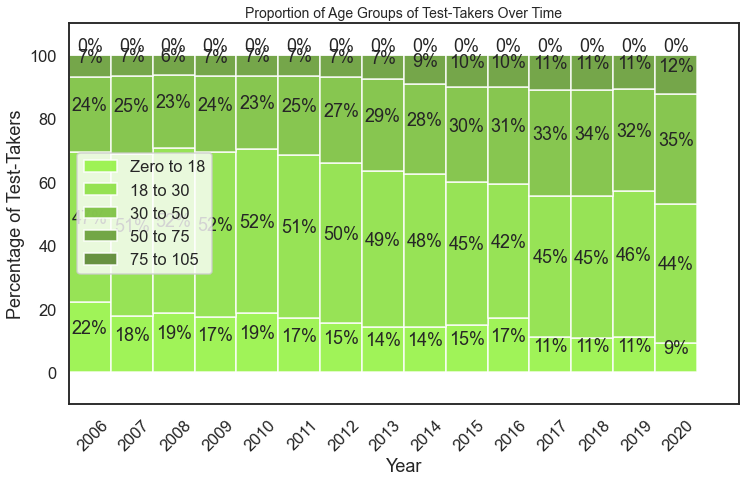

In [270]:
f, ax = plt.subplots(1, figsize=(12,7))
colors = ['#96f246', '#8ce043', '#7ac03d', '#669d36', '#598630']

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(pol_pr[1.0]))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(age_pr['(0, 18]'], age_pr['(18, 30]'], age_pr['(30, 50]'], age_pr['(50, 75]'], age_pr['(75, 105]'])]

# Create the percentage of the total score the pre_score value for each participant was
one_rel = [i / j * 100 for  i,j in zip(age_pr['(0, 18]'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
two_rel = [i / j * 100 for  i,j in zip(age_pr['(18, 30]'], totals)]

# Create the percentage of the total score the post_score value for each participant was
three_rel = [i / j * 100 for  i,j in zip(age_pr['(30, 50]'], totals)]
four_rel = [i / j * 100 for  i,j in zip(age_pr['(50, 75]'], totals)]
five_rel = [i / j * 100 for  i,j in zip(age_pr['(75, 105]'], totals)]


ax.bar(bar_l, 
       one_rel, 
       # labeled 
       label='Zero to 18', 
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[0],
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       two_rel, 
       # with pre_rel
       bottom=one_rel, 
       # labeled 
       label='18 to 30', 
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[1], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white',
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       three_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(one_rel, two_rel)], 
       # labeled 
       label='30 to 50',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[2], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       four_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(one_rel, two_rel, three_rel)], 
       # labeled 
       label='50 to 75',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[3], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       five_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(one_rel, two_rel, three_rel, four_rel)], 
       # labeled 
       label='75 to 105',
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[4], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )



# Set the ticks to be years
plt.xticks(tick_pos, years)
ax.set_ylabel("Percentage of Test-Takers")
ax.set_xlabel("Year")
ax.set_title("Proportion of Age Groups of Test-Takers Over Time", fontsize=14)
ax.legend()

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set_theme('talk')
sns.set_style('white')

for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

# show plot
plt.show()

# source = https://chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/

To understand explicit measure v. implicit score

Explicit Measure = assocareer_int

"Strongly female": 1, "Moderately female": 2, "Slightly female": 3, "Neither male nor female": 4, "Slightly male": 5, "Moderately male": 6, "Strongly male": 7

In [272]:
# So, for 2020 data, how good are we at identifying where we are with this? Explicit v. Implicit for 2020 USA|